### Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading Dataframe

In [2]:
pd.options.display.max_columns = 157
folder_path = os.path.join('..','data')
file_path = os.path.join(folder_path, 'loan_data.csv')

df = pd.read_csv(file_path)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Here it follows de data dictionary about the dataset


| column                            | description                                       | datatype    |
|:----------------------------------|:--------------------------------------------------|:------------|
| person_age	                    | Age of the person	                                | Float       |
| person_gender	                    | Gender of the person                              | Categorical |
| person_education	                | Highest education level                           | Categorical |
| person_income	                    | Annual income	                                    | Float       |
| person_emp_exp	                | Years of employment experience	                | Integer     |
| person_home_ownership	            | Home ownership status (e.g., rent, own, mortgage) | Categorical |
| loan_amnt	                        | Loan amount requested                          	| Float       |
| loan_intent       	            | Purpose of the loan	                            | Categorical |
| loan_int_rate      	            | Loan interest rate                             	| Float       |
| loan_percent_income	            | Loan amount as a percentage of annual income	    | Float       |
| cb_person_cred_hist_length        | Length of credit history in years	                | Float       |
| credit_score	                    | Credit score of the person	                    | Integer     |
| previous_loan_defaults_on_file	| Indicator of previous loan defaults	            | Categorical |
| loan_status (target variable)     | Loan approval status: 1 = approved; 0 = rejected	| Integer     |

### Dataset descriptive analysis

#### Column Types/ Not Nulls/ Duplicated

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df.shape

(45000, 14)

In [5]:
# Seeing the categorical values for each column:

cat_columns = df.select_dtypes(include='object')
for column in cat_columns:
    c = df[column].unique()
    print(f'The column {column} has the following values:')
    print(c)
    print('-'*45)

The column person_gender has the following values:
['female' 'male']
---------------------------------------------
The column person_education has the following values:
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
---------------------------------------------
The column person_home_ownership has the following values:
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
---------------------------------------------
The column loan_intent has the following values:
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
---------------------------------------------
The column previous_loan_defaults_on_file has the following values:
['No' 'Yes']
---------------------------------------------


In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
df.describe(include='object')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [8]:
## Checking if it has duplicate registers
df.duplicated().sum()

np.int64(0)

In [9]:
## Checking if it has missing values
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

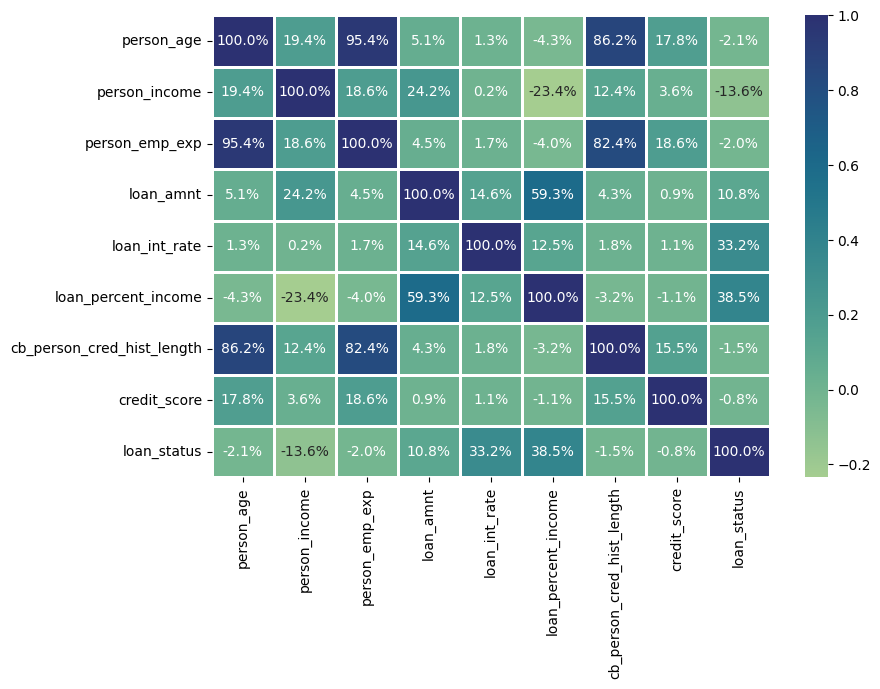

In [10]:
## Checking the correlation between the columns
corr_matrix = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix, annot= True, fmt= '.1%', cmap='crest', linewidths= 2)
plt.show()

#### Checking univariate distribution

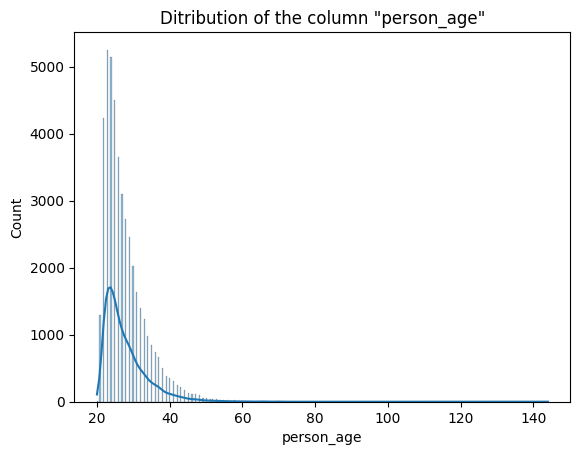

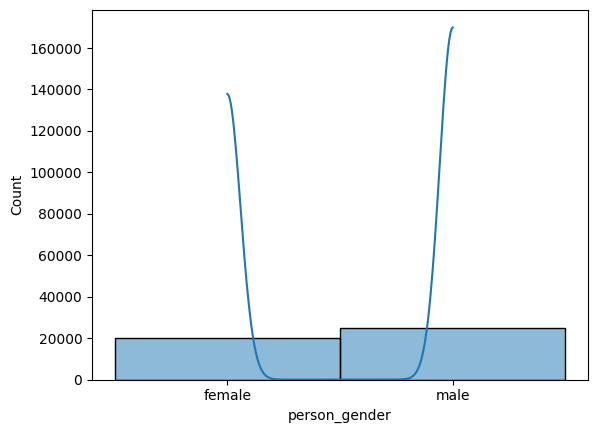

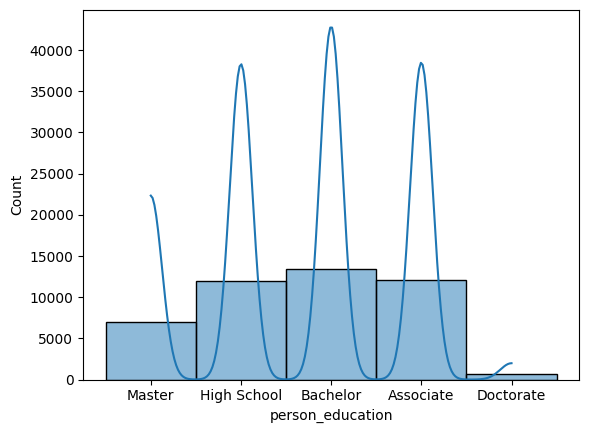

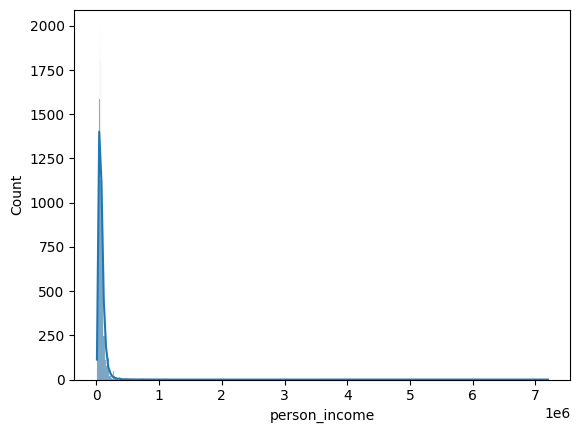

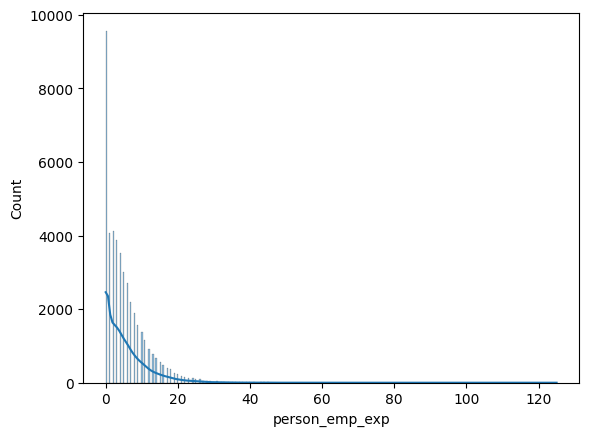

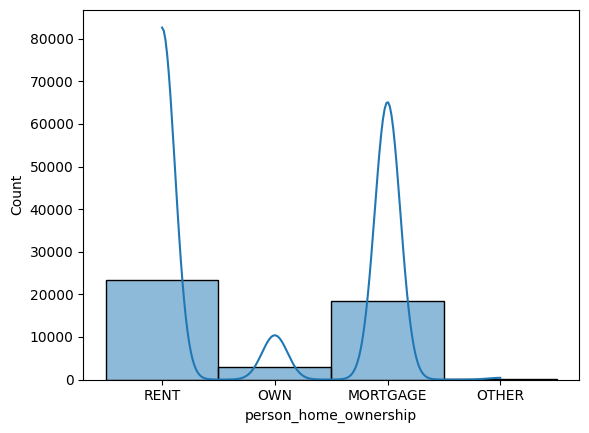

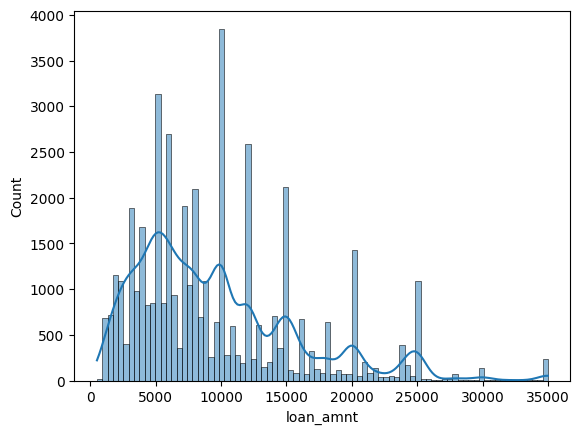

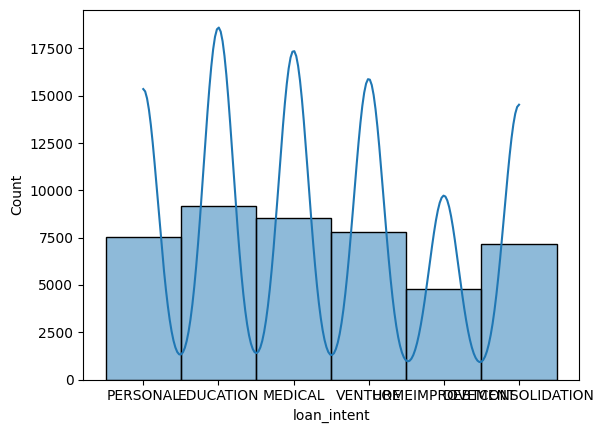

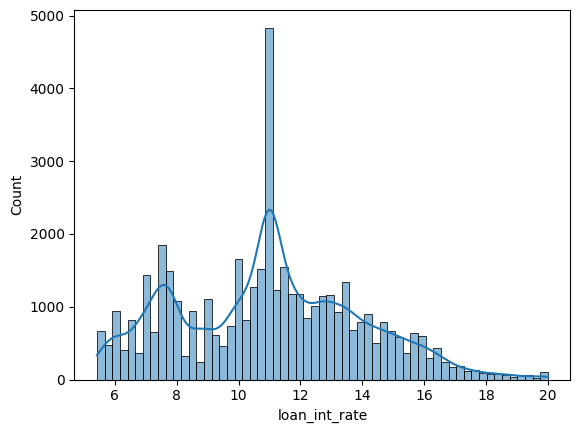

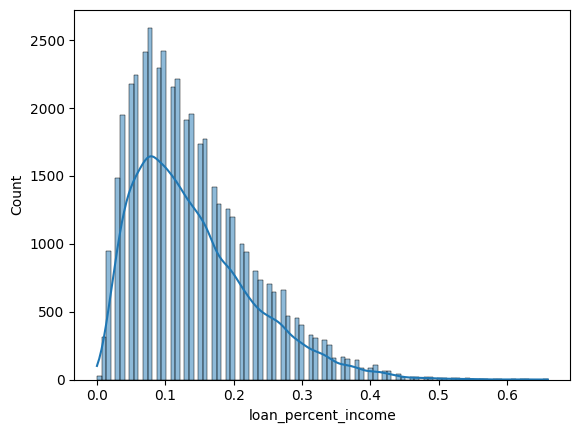

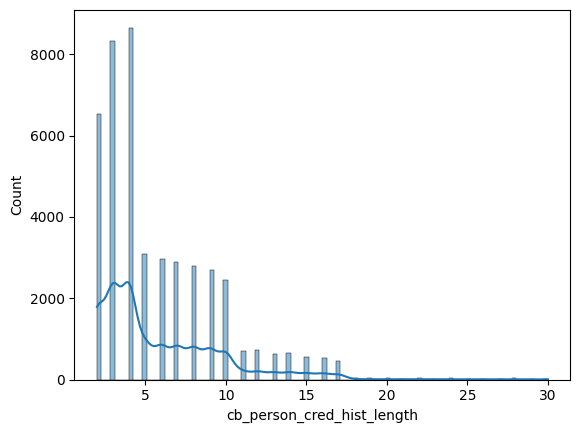

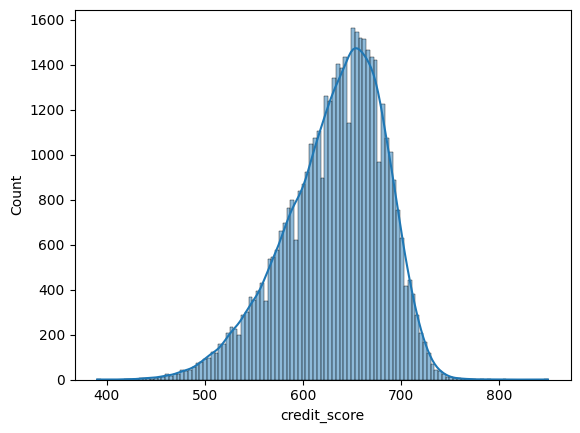

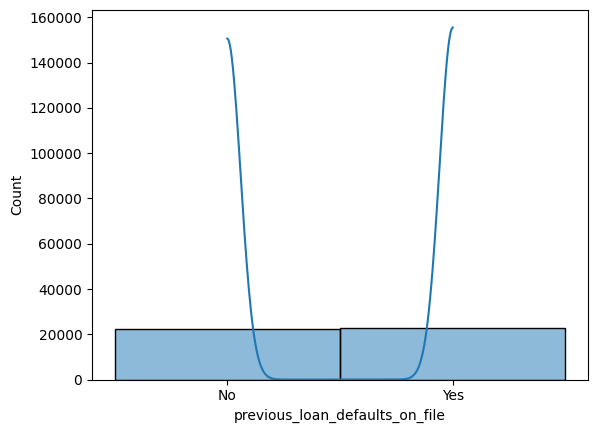

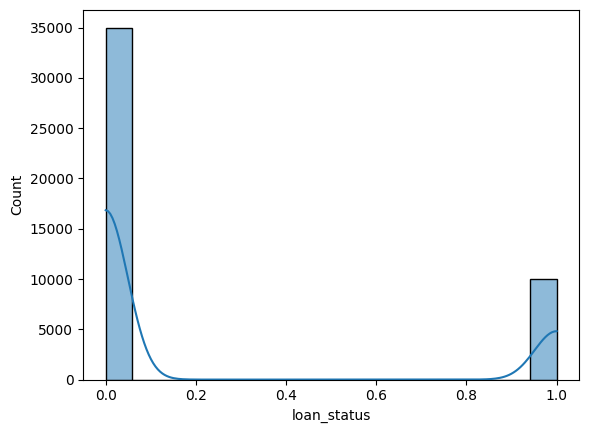

In [11]:
fig, ax = plt.subplots()

for c in df.columns:
    sns.histplot(df[c], kde= True)
    ax.set_xlabel(f'{c}')
    ax.set_title(f'Ditribution of the column "{c}"')
    plt.show()


#### Checking bivariate distribution in some cases

In [12]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [13]:
df['person_age'].describe()

count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

In [14]:
def plt_bivariate_hist(data, x, hue):
    fig, ax = plt.subplots()
    sns.histplot(data, x=x, hue=hue, element= 'step')
    ax.set_title(f'{c} x Age Range Histogram')
    ax.set_xlabel(c)
    plt.show()

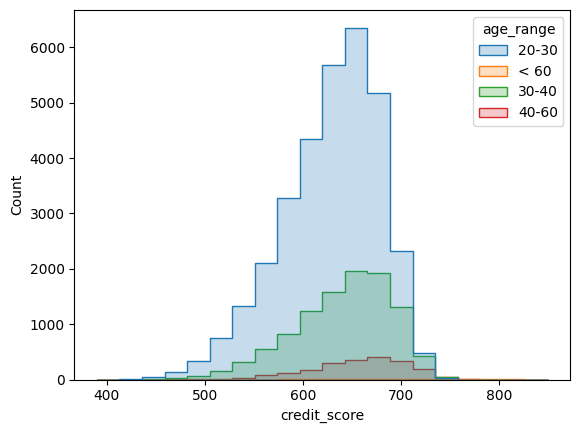

In [15]:

df['age_range'] = df['person_age'].apply(lambda x : '20-30' if x < 30
                                               else '30-40' if 30 <= x < 40
                                               else '40-60' if 40 <= x < 60
                                               else '< 60')
fig, ax = plt.subplots()
sns.histplot(df, x='credit_score', hue= 'age_range',bins= 20 , element= 'step')
plt.show()


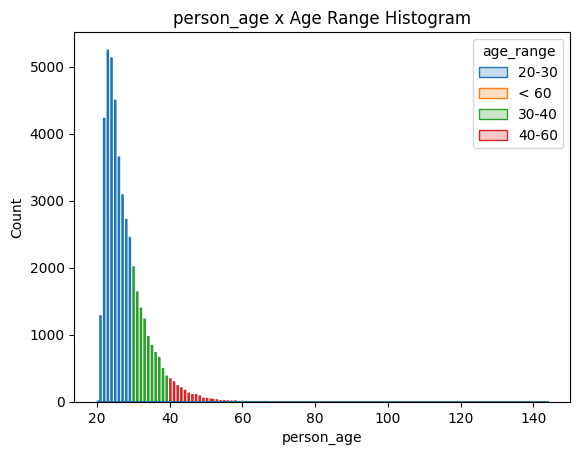

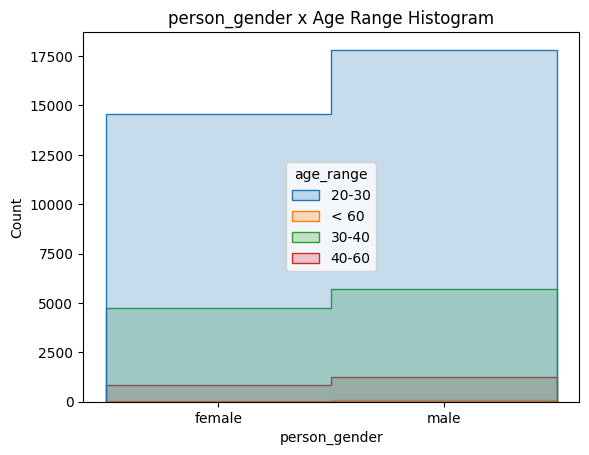

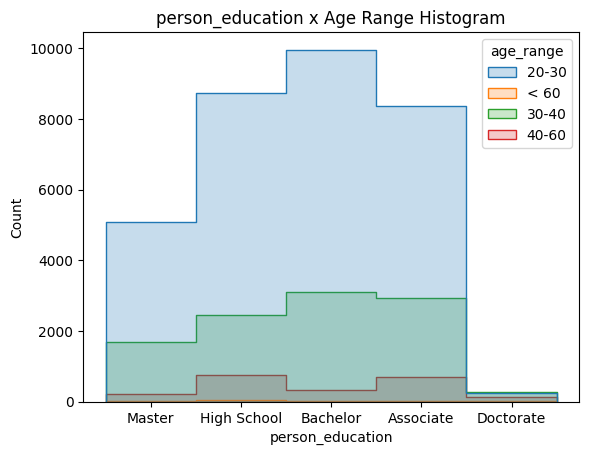

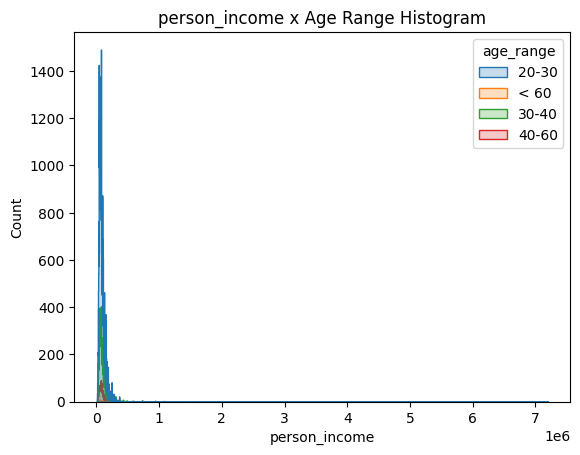

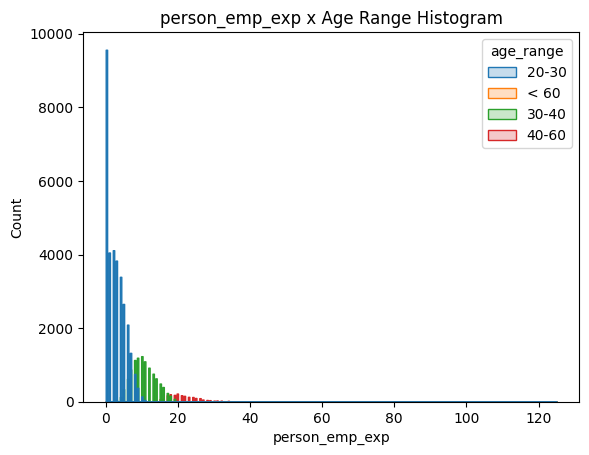

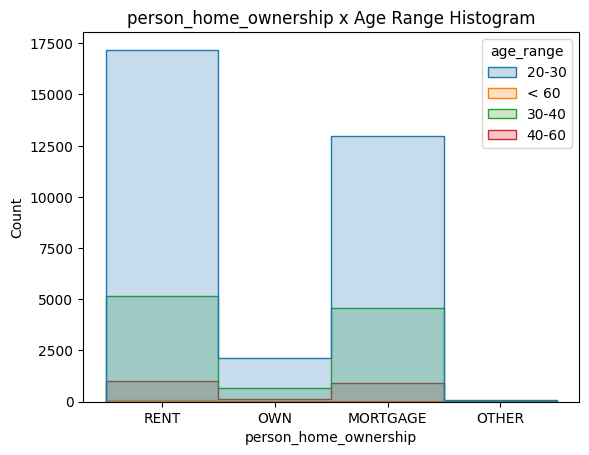

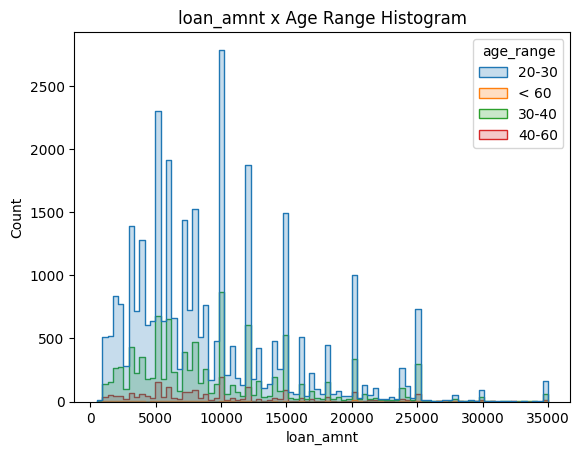

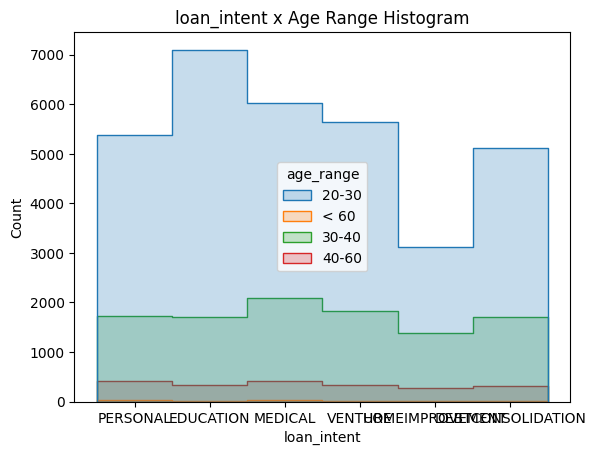

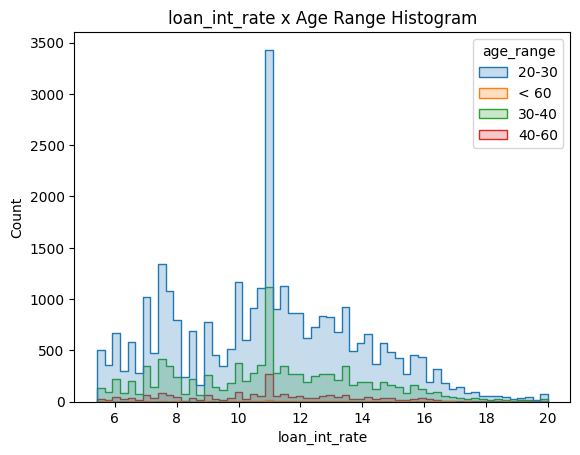

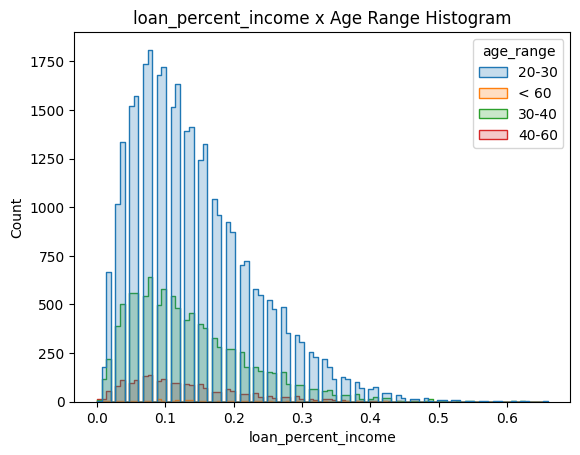

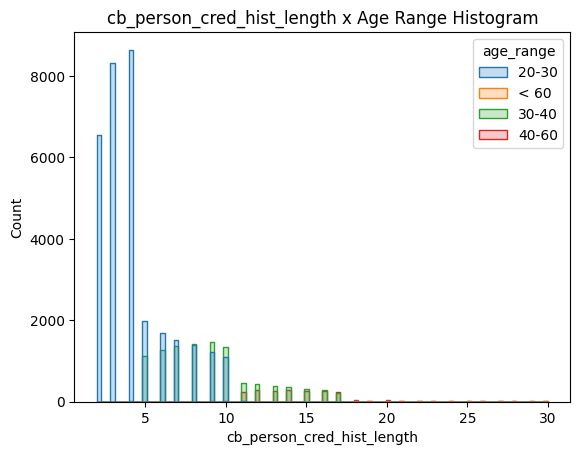

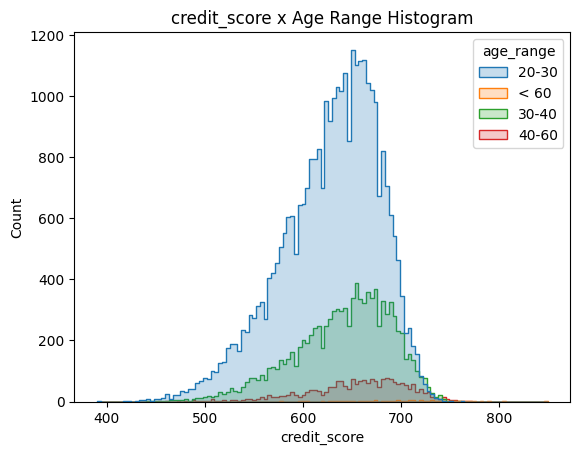

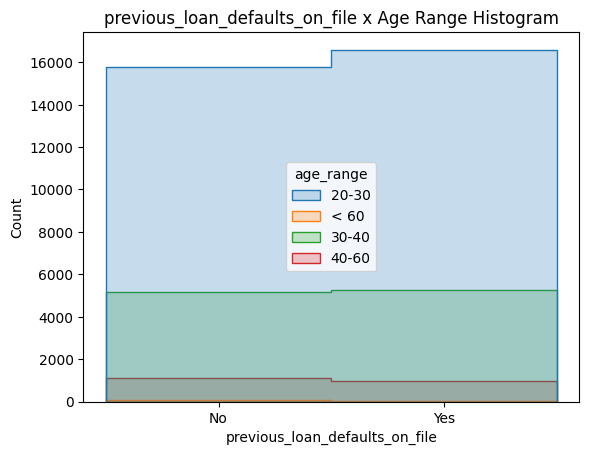

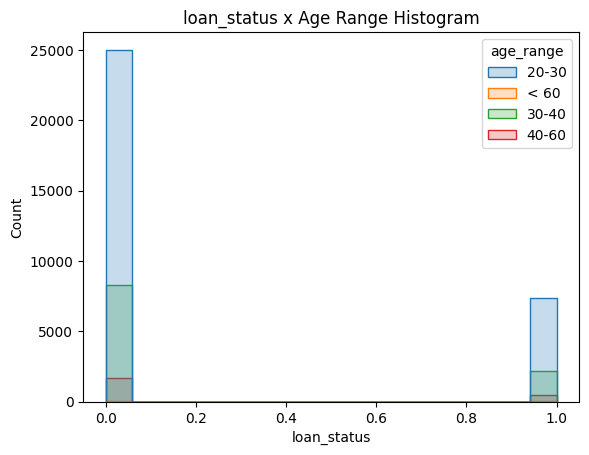

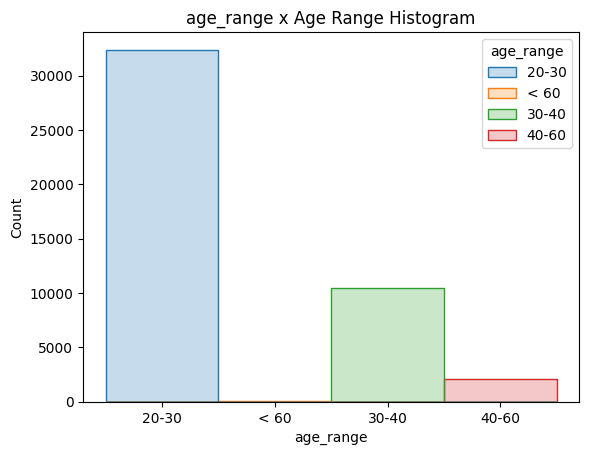

In [16]:
for c in df.columns:
    plt_bivariate_hist(df, c, 'age_range')

#### Checking the correlation between the numerical features

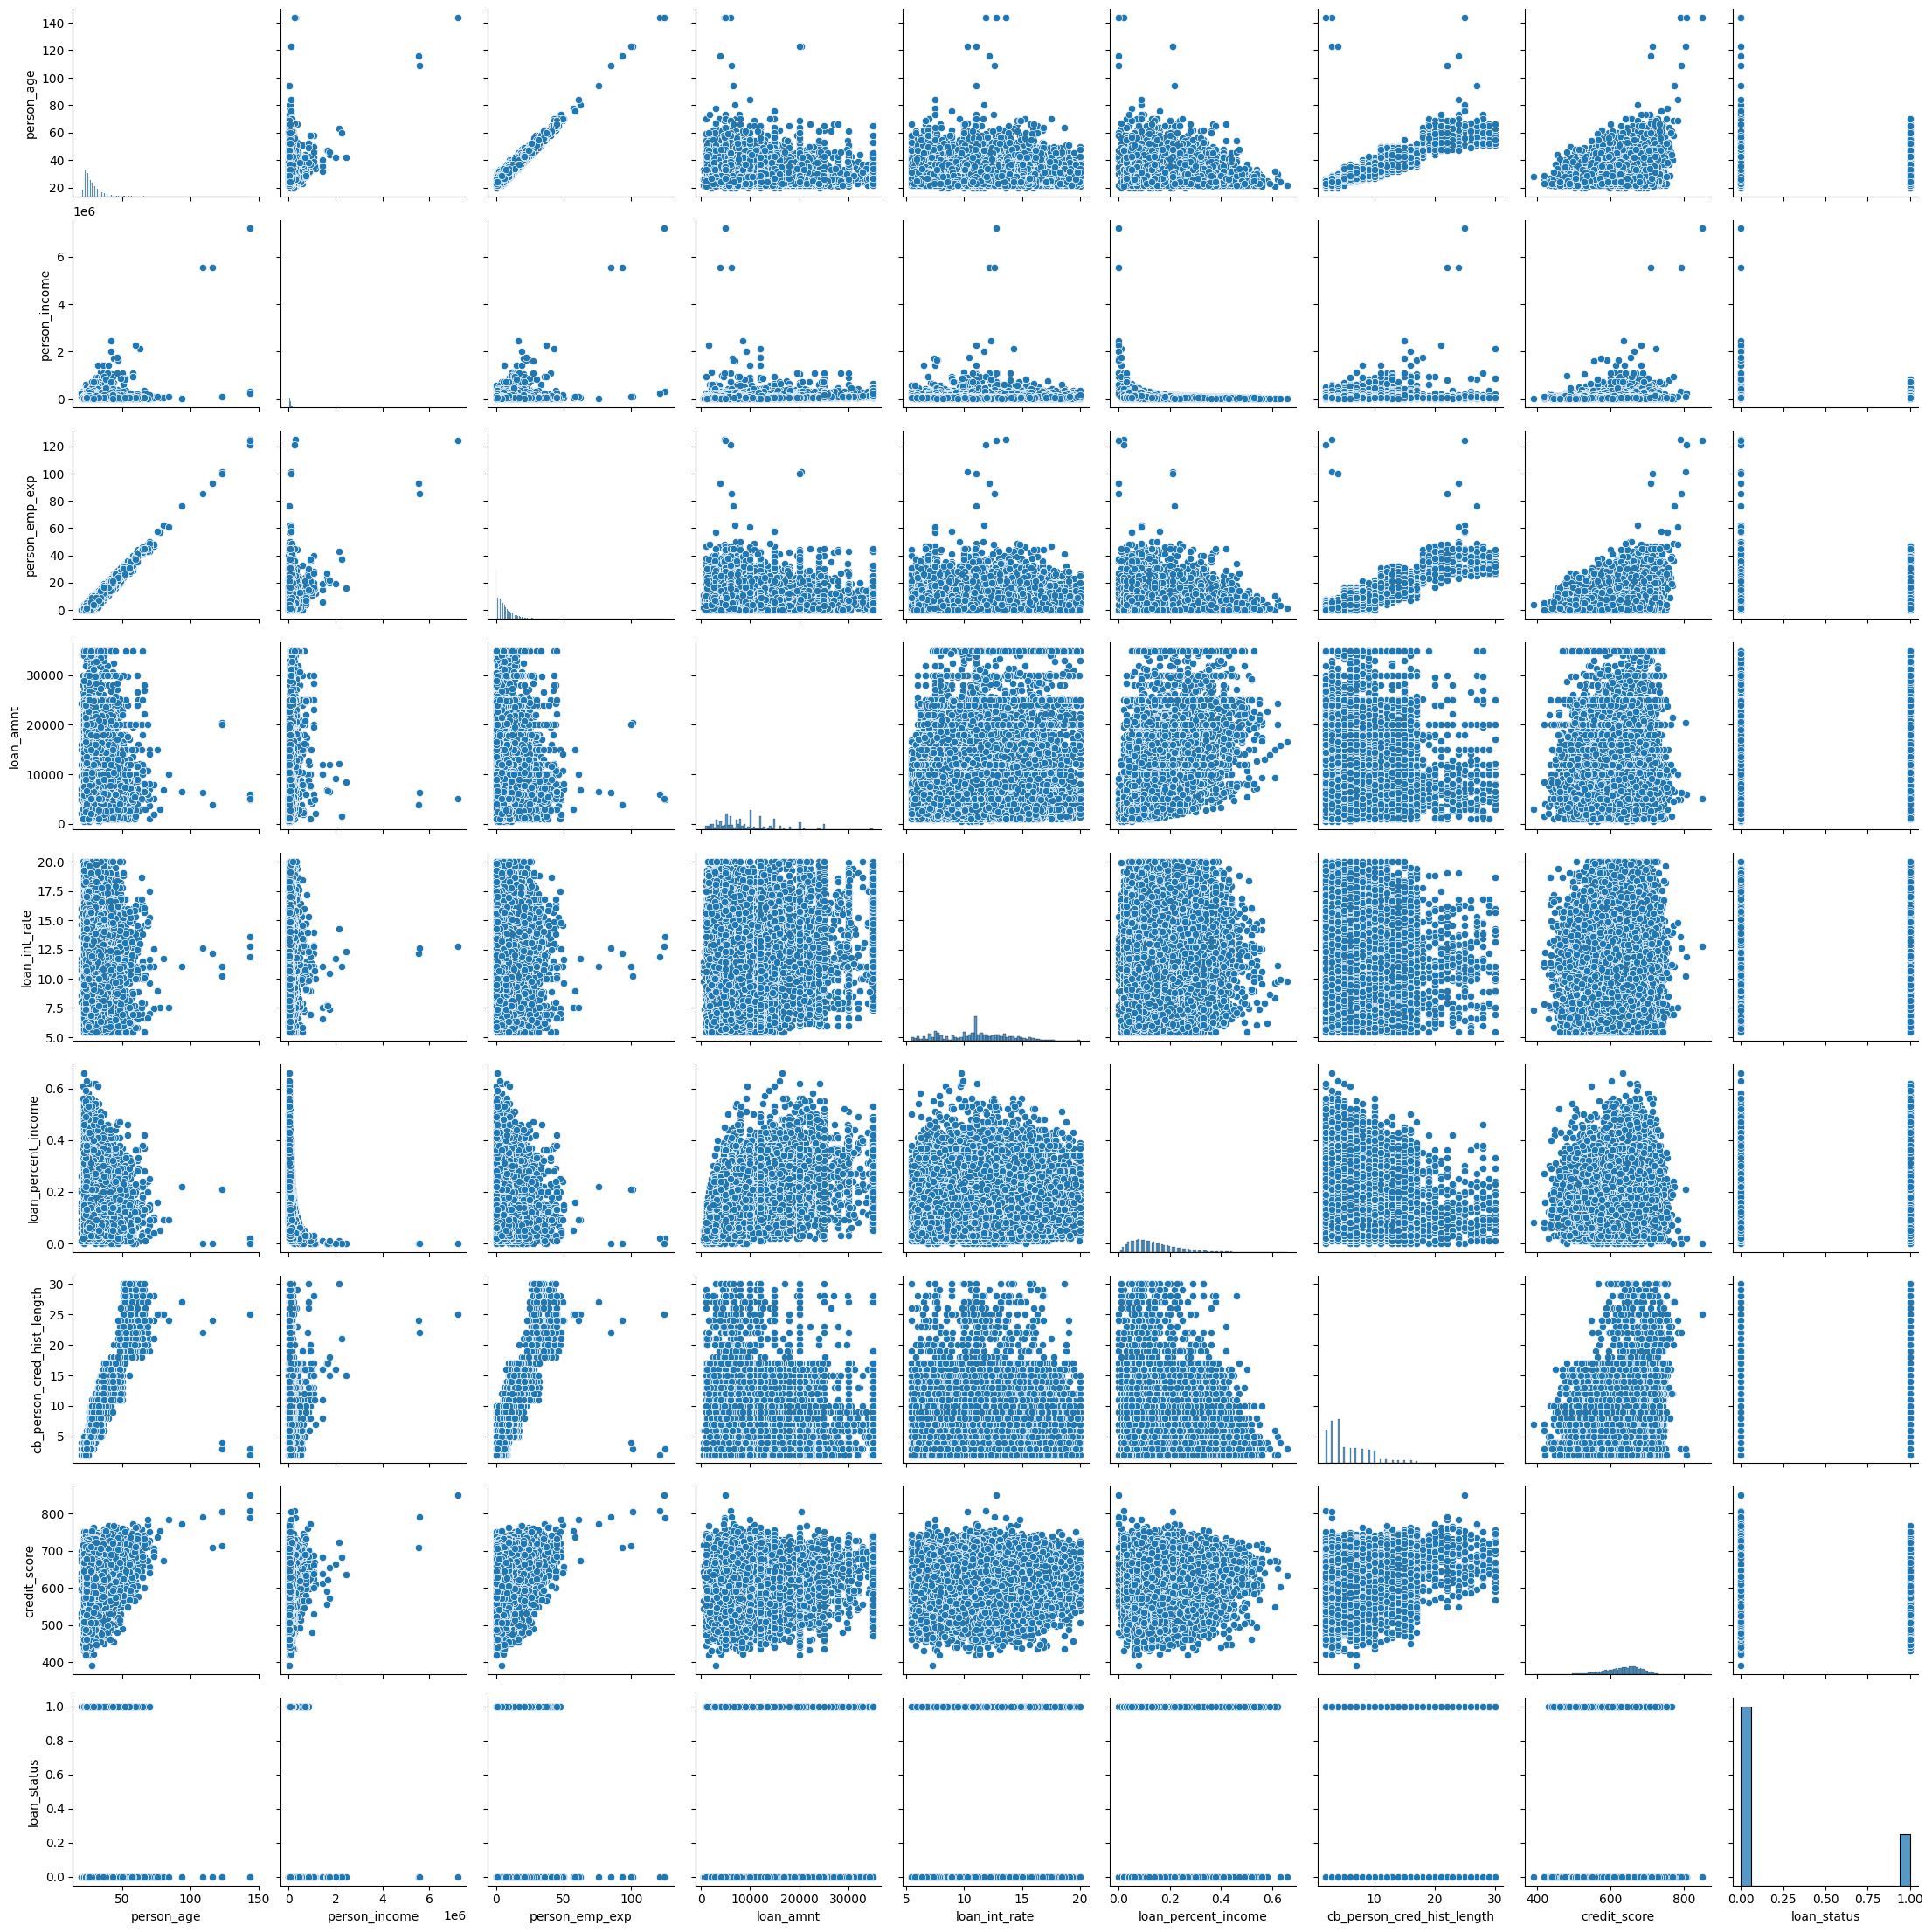

In [17]:
num_columns = df.select_dtypes(exclude='object')
sns.pairplot(num_columns)
plt.show()

### Feature Engineering

Possible new features:

**Loan Income Ratio**:
- **Calculation:** Ratio between the loan and the income of the person who did it.
- Can evaluate how much the the loan represents of the person income. Higher values can be a strong indicator of delinquency 

**Credit Score Category**:
- Can evaluate easily transforming from numerical scores to categorical ones.

**Employment Experience Group**:
- The same motivation behind the credit score category.

**Weighted Credit History Score**:
- Interaction of credit score and credit history length. Long credit histories with high score indcate reliable borrowers.

**Income category**:
- The same motivation behind the credit score category.

In [18]:
## I'll desconsiderate these registers of persons with more than 76 years of work because these people are no longer with us and represents meaningless
## percentage of total size of the dataset (< 0.02%) 

df = df[df['person_emp_exp'] <= 76]

# Implementing the new features:

## Loan Income Ratio
df['loan_income_ratio'] = df['loan_amnt'] / df['person_income']

## Credit Score Category
df['credit_score_category'] = pd.cut(
      df['credit_score']
    , bins= [300, 579, 669, 739, 799, 850]
    , labels= ['Very poor', 'Fair', 'Good', 'Very good', 'Exceptional']
)

## Employment Experience Groups
df['emp_exp_group'] = pd.cut(
      df['person_emp_exp']
    , bins= [-1, 2, 5, 10, float('inf')]
    , labels=['Entry-level', 'Mid-career', 'Experienced', 'Veteran']
)

## Weighted Credit History Score
df['weighted_credit_history'] = df['credit_score']*df['cb_person_cred_hist_length']

## Income category
df['income_category'] = pd.qcut(
      df['person_income']
    , q= 4
    , labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High']
)

## Changing the types of categorical columns
for c in df.select_dtypes(include='object'):
    df[c] = df[c].astype('category')
raw = df.copy()

### Creting transformation and modeling pipeline: 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#### Creating the Column Transformer Pipeline

In [20]:
X = raw.drop(columns=['loan_status'], axis= 1)
y = raw['loan_status']
## Separating the feature types
numerical_features = X.select_dtypes(exclude=['category','object']).columns
categorical_features = X.select_dtypes(include=['category', 'object']).columns

In [63]:
## Creating the pipelines objects object
num_pipeline = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    [
        ('num_pipeline', num_pipeline, numerical_features),
        ('cat_pipeline', cat_pipeline, categorical_features),
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Ajusta o pipeline
pipeline.fit(X)

# Obtém os nomes das colunas transformadas
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

In [64]:
feature_names

array(['num_pipeline__person_age', 'num_pipeline__person_income',
       'num_pipeline__person_emp_exp', 'num_pipeline__loan_amnt',
       'num_pipeline__loan_int_rate', 'num_pipeline__loan_percent_income',
       'num_pipeline__cb_person_cred_hist_length',
       'num_pipeline__credit_score', 'num_pipeline__loan_income_ratio',
       'num_pipeline__weighted_credit_history',
       'cat_pipeline__person_gender_female',
       'cat_pipeline__person_gender_male',
       'cat_pipeline__person_education_Associate',
       'cat_pipeline__person_education_Bachelor',
       'cat_pipeline__person_education_Doctorate',
       'cat_pipeline__person_education_High School',
       'cat_pipeline__person_education_Master',
       'cat_pipeline__person_home_ownership_MORTGAGE',
       'cat_pipeline__person_home_ownership_OTHER',
       'cat_pipeline__person_home_ownership_OWN',
       'cat_pipeline__person_home_ownership_RENT',
       'cat_pipeline__loan_intent_DEBTCONSOLIDATION',
       'cat_pipelin

#### Splitting the dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42 )


In [23]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.fit_transform(X_test)

print(X_train_prepared.shape, X_test_prepared.shape)

(35994, 45) (8999, 45)


#### Creating model evaluation function

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, log_loss

def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    prec = precision_score(true, predicted)
    rec = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    class_report = classification_report(true, predicted)
    roc = roc_auc_score(true, predicted)
    conf_matrix = confusion_matrix(true, predicted)
    logloss = log_loss(true, predicted)

    return acc, prec, rec, f1, class_report, roc, conf_matrix, logloss

models = {
    'Logistic Regression': LogisticRegressionCV(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVC': SVC(kernel= 'rbf')
}

evaluation_dict = {
    'model' : [],
    'accuracy' : [],
    'precision' : [],
    'recall' : [],
    'f1-score': [],
    'log-loss':[]
}



#### Evaluating models

In [74]:
for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    model.fit(X_train_prepared, y_train) 

    # making the predictions
    y_train_pred = model.predict(X_train_prepared)
    y_test_pred = model.predict(X_test_prepared)

    # Evaluating each model
    # Train Set
    acc_train, prec_train, rec_train, f1_train, class_report_train, roc_train, conf_matrix_train, logloss_train = evaluate_model(y_train, y_train_pred)

    # Test set
    acc_test, prec_test, rec_test, f1_test, class_report_test, roc_test, conf_matrix_test, logloss_test = evaluate_model(y_test, y_test_pred)

    # Printing the results
    print(model_name)
    print('-' * 60)
    print('Model Evaluation on train set:')
    print(class_report_train)
    print(f'ROC AUC Score: {roc_train:.2f}')
    print(f'Confusion Matrix:')
    print(conf_matrix_train)
    print('-' * 60)
    print('Model Evaluation on test set:')
    print(class_report_test)
    print(f'ROC AUC Score: {roc_test:.2f}')
    print(f'Confusion Matrix:')
    print(conf_matrix_test)
    print('=' * 60)
    print('\n')

    evaluation_dict['model'].append(model_name)
    evaluation_dict['accuracy'].append(acc_test)
    evaluation_dict['precision'].append(prec_test)
    evaluation_dict['recall'].append(rec_test)
    evaluation_dict['f1-score'].append(f1_test)
    evaluation_dict['log-loss'].append(logloss_test)

Logistic Regression
------------------------------------------------------------
Model Evaluation on train set:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27991
           1       0.78      0.75      0.76      8003

    accuracy                           0.90     35994
   macro avg       0.86      0.84      0.85     35994
weighted avg       0.90      0.90      0.90     35994

ROC AUC Score: 0.84
Confusion Matrix:
[[26337  1654]
 [ 2038  5965]]
------------------------------------------------------------
Model Evaluation on test set:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7002
           1       0.79      0.74      0.76      1997

    accuracy                           0.90      8999
   macro avg       0.86      0.84      0.85      8999
weighted avg       0.90      0.90      0.90      8999

ROC AUC Score: 0.84
Confusion Matrix:
[[6602  400]
 [ 520 1477]]


Decisio

In [75]:
df_evaluation = pd.DataFrame(evaluation_dict)
df_evaluation.head().sort_values(by= ['f1-score','recall'],ascending= [False, False])

,model,accuracy,precision,recall,f1-score,log-loss
2,Random Forest,0.927881,0.896938,0.762644,0.824357,2.599437
3,XGBoost,0.922214,0.853792,0.783676,0.817232,2.803707
4,SVC,0.920991,0.869540,0.757636,0.809740,2.847765
1,Decision Tree,0.893877,0.754892,0.772659,0.763672,3.825057
0,Logistic Regression,0.897766,0.786894,0.739609,0.762519,3.684872


In [69]:
#### Checking the feature importance for the top 3 models: 
from sklearn.inspection import permutation_importance

rf_clf = RandomForestClassifier()
xgb_clf= XGBClassifier()
#svc_clf= SVC(kernel='rbf')

rf_clf.fit(X_train_prepared, y_train)
xgb_clf.fit(X_train_prepared, y_train)
#svc_clf.fit(X_train_prepared, y_train)

rf_feature_importances = rf_clf.feature_importances_
xgb_feature_importances = xgb_clf.feature_importances_
# #svc_feature_importances = permutation_importance(svc_clf, X_test_prepared, y_test, n_repeats= 1, random_state= 42)

# feature_importance_df = pd.DataFrame(
#     {
#         'Feature': X.columns,
#         'Random Forest': rf_feature_importances,
#         'XGB': xgb_feature_importances,
#         #'SVC': svc_feature_importances
#     }
# )
# feature_importance_df.head()
# print(rf_feature_importances)

In [71]:
rf_feature_importance_df = pd.DataFrame({
    'feature names': feature_names,
    'rf': rf_feature_importances*100,
    'xgb': xgb_feature_importances*100

})

rf_feature_importance_df.sort_values(by= 'rf',ascending=False)

,feature names,rf,xgb
4,num_pipeline__loan_int_rate,13.063546,1.559527
27,cat_pipeline__previous_loan_defaults_on_file_No,11.716239,75.945663
28,cat_pipeline__previous_loan_defaults_on_file_Yes,11.337466,0.000000
8,num_pipeline__loan_income_ratio,10.936912,2.394909
5,num_pipeline__loan_percent_income,9.008325,0.194854
1,num_pipeline__person_income,8.063043,1.024724
3,num_pipeline__loan_amnt,4.117186,0.299918
7,num_pipeline__credit_score,3.744214,0.419254
20,cat_pipeline__person_home_ownership_RENT,3.457507,3.800462
9,num_pipeline__weighted_credit_history,3.112538,0.261066


#### Fine Tuning the two models

In [82]:
from sklearn.model_selection import GridSearchCV

##### Random Forest

In [ ]:
rf_params = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [90]:
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=rf_params,
    scoring='precision',  
    cv=3,               
    verbose=1,          
    n_jobs=-1           
)

In [91]:
# Realizar o Grid Search
grid_search_rf.fit(X_train_prepared, y_train)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:\n", grid_search_rf.best_params_)

# Avaliar no conjunto de teste
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test_prepared)
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Melhores parâmetros:
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7002
           1       0.94      0.62      0.74      1997

    accuracy                           0.91      8999
   macro avg       0.92      0.80      0.84      8999
weighted avg       0.91      0.91      0.90      8999



##### XGBoost

In [93]:
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'min_child_weight': [1, 3, 5]
}

In [94]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=xgb_params,
    scoring='precision',  
    cv=3,               
    verbose=1,          
    n_jobs=-1           
)

# Realizar o Grid Search
grid_search_xgb.fit(X_train_prepared, y_train)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:\n", grid_search_xgb.best_params_)

# Avaliar no conjunto de teste
best_model = grid_search_xgb.best_estimator_
y_pred = best_model.predict(X_test_prepared)
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/home/icavalca/workspace/repo/classification_project/.env/lib/python3.9/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros:
 {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50}

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7002
           1       1.00      0.03      0.07      1997

    accuracy                           0.79      8999
   macro avg       0.89      0.52      0.47      8999
weighted avg       0.83      0.79      0.70      8999

